## Binary Sentiment Classification

In [1]:
# Install required libraries
!pip install transformers scikit-learn matplotlib seaborn numpy scipy requests

# Clone SentEval for datasets
!git clone https://github.com/facebookresearch/SentEval.git

# Download benchmark datasets from SentEval
%cd SentEval/data/downstream
!bash get_transfer_data.bash
%cd ../../../

# Import required libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.stats import spearmanr
import requests
import os

# Load MR dataset
dataset_path = "./SentEval/data/downstream/MR"
with open(os.path.join(dataset_path, "rt-polarity.pos"), "r") as f_pos:
    positive_samples = [line.strip() for line in f_pos.readlines()]
with open(os.path.join(dataset_path, "rt-polarity.neg"), "r") as f_neg:
    negative_samples = [line.strip() for line in f_neg.readlines()]
sentences = positive_samples + negative_samples
labels = [1] * len(positive_samples) + [0] * len(negative_samples)


Cloning into 'SentEval'...
remote: Enumerating objects: 691, done.
remote: Counting objects: 100% (395/395), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 691 (delta 293), reused 277 (delta 277), pack-reused 296 (from 1)
Receiving objects: 100% (691/691), 33.23 MiB | 12.06 MiB/s, done.
Resolving deltas: 100% (452/452), done.
Updating files: 100% (39/39), done.
/content/SentEval/data/downstream
Cloning Moses github repository (for tokenization scripts)...
Cloning into 'mosesdecoder'...
remote: Enumerating objects: 148459, done.
remote: Counting objects: 100% (887/887), done.
remote: Compressing objects: 100% (366/366), done.
remote: Total 148459 (delta 565), reused 797 (delta 517), pack-reused 147572 (from 1)
Receiving objects: 100% (148459/148459), 129.99 MiB | 9.04 MiB/s, done.
Resolving deltas: 100% (114591/114591), done.
mkdir: cannot create directory ‘.’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
           

              precision    recall  f1-score   support

           0       0.75      0.78      0.77      1071
           1       0.77      0.74      0.75      1062

    accuracy                           0.76      2133
   macro avg       0.76      0.76      0.76      2133
weighted avg       0.76      0.76      0.76      2133



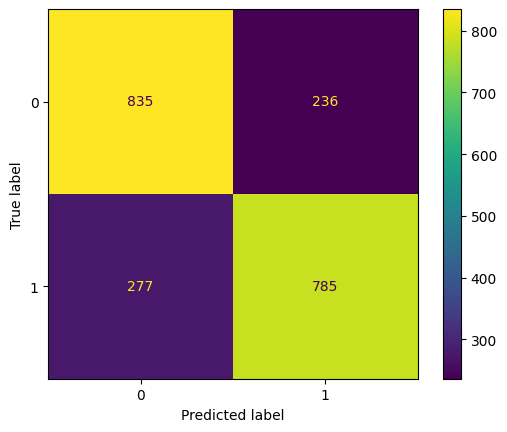

In [2]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Naive Bayes classifier
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = nb_clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)